Saving bird.png to bird (4).png


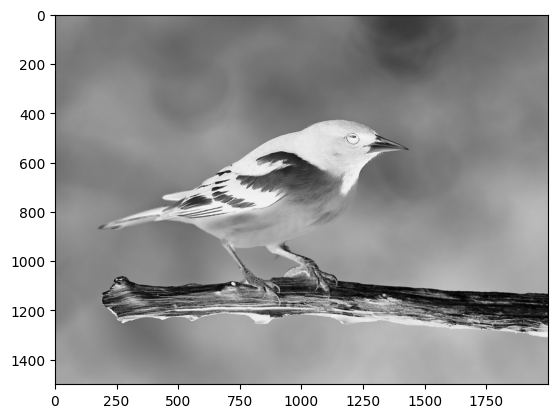

In [ ]:
# 1 Biến đổi cường độ ảnh
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('L')
im_l = np.asarray(img)
im_2 = 255 - im_l

new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img, cmap='gray')
plt.show()

Saving Screenshot 2025-06-06 103334.png to Screenshot 2025-06-06 103334 (7).png


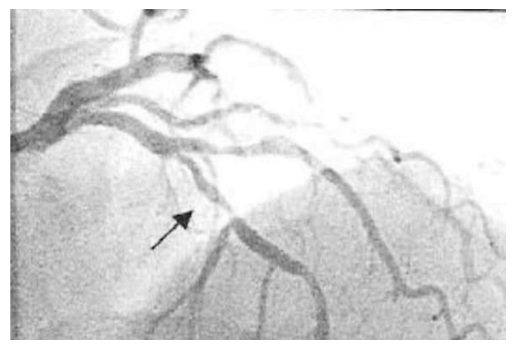

In [ ]:
# 2 Thay đổi chất lượng ảnh
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = Image.open(filename).convert('L')
im_l = np.asarray(img)

gamma = 0.5

b1 = im_l.astype(float)
b2 = np.max(b1)

b3 = b1 / b2

b4 = np.power(b3, gamma)

c = b4 * 255.0

cl = np.clip(c, 0, 255).astype(np.uint8)

d = Image.fromarray(cl)

img.show()
d.show()

plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


Saving Screenshot 2025-06-06 103350.png to Screenshot 2025-06-06 103350 (7).png


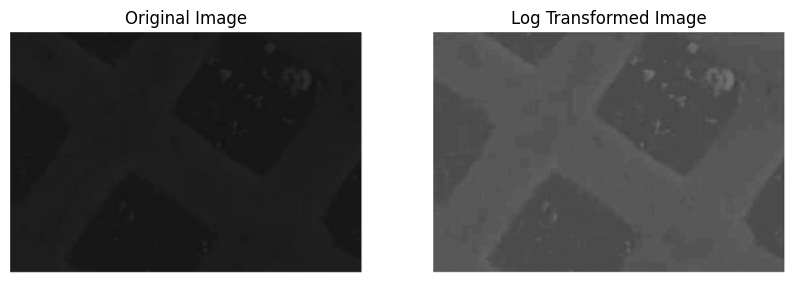

In [ ]:
# 3 Thay đổi cường độ điểm ảnh với LOG TRANSFORMATION
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

filename = list(uploaded.keys())[0]

img = Image.open(filename).convert('L')

im_l = np.asarray(img)

im_l = im_l.astype(float)

b1 = np.max(im_l)

b2 = np.max(im_l)
cl = (128.0 * np.log(1 + im_l)) / np.log(1 + b2)

cl = np.uint8(cl)

d = Image.fromarray(cl)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(d, cmap='gray')
plt.title("Log Transformed Image")
plt.axis('off')

plt.show()


Saving Screenshot 2025-06-06 103404.png to Screenshot 2025-06-06 103404 (2).png


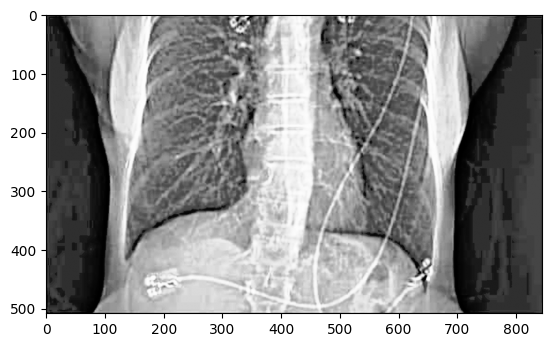

In [ ]:
# 4 Histogram equalization
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('L')
iml = np.asarray(img)
bl = iml.flatten()
hist, bins = np.histogram(iml, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf_m / den_cdf_m
cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf_m[bl]
im3 = np.reshape(im2, iml.shape)
im3_img = Image.fromarray(im3)
img.show()
im3_img.show()
plt.imshow(im3_img, cmap='gray')
plt.show()


Saving Screenshot 2025-06-06 103404.png to Screenshot 2025-06-06 103404 (5).png
37 234


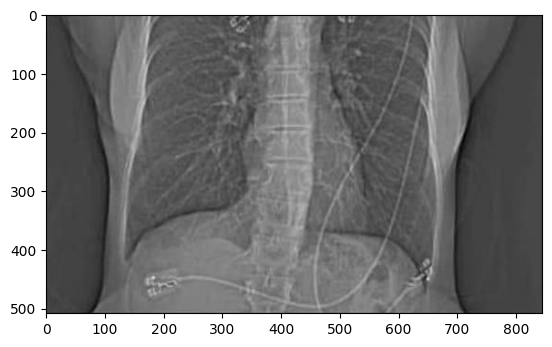

In [ ]:
# 5 Thay đổi ảnh với Contrast stretching
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open the image from file
img = Image.open(filename).convert('L')

# Convert image into a numpy array
iml = np.asarray(img)

# Finding the maximum and minimum pixel values
b = iml.max()
a = iml.min()

# Print the min and max values
print(a, b)

# Converting iml to float for calculation
iml = iml.astype(float)

# Contrast stretching transformation
c = iml
im2 = 255 * (c - a) / (b - a)

# Convert ndarray back to image
im3 = Image.fromarray(im2.astype(np.uint8))

# Display the original and output images
img.show()
im3.show()

# Also, plot the output using matplotlib
plt.imshow(im3, cmap='gray')
plt.show()


Saving Screenshot 2025-06-06 103428.png to Screenshot 2025-06-06 103428 (2).png


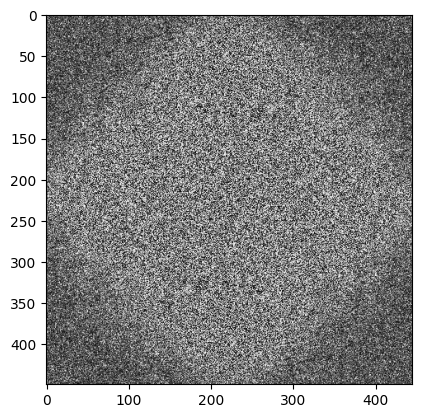

In [ ]:
# 6 Biến đổi Fourier
# fast fourier
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('L')

iml = np.asarray(img)

c = abs(scipy.fftpack.fft2(iml))

d = scipy.fftpack.fftshift(c)
d = d.astype(float)

im3 = Image.fromarray(np.abs(d).astype(np.uint8))

img.show()
plt.imshow(im3, cmap='gray')
plt.show()


Saving Screenshot 2025-06-06 103428.png to Screenshot 2025-06-06 103428 (6).png


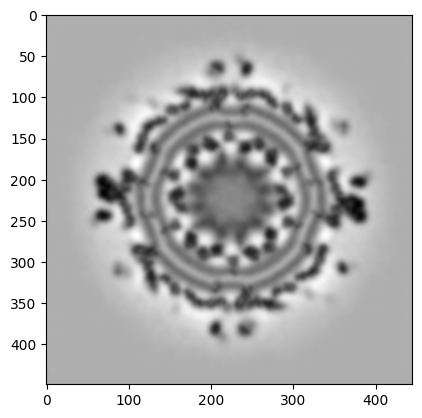

In [ ]:
#Lọc ảnh miền tầng xuất
# lowpass
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = Image.open(filename).convert('L')
iml = np.asarray(img)

c = np.fft.fft2(iml)
d = np.fft.fftshift(c)

M = d.shape[0]
N = d.shape[1]
center1 = M / 2
center2 = N / 2
d0 = 30.0
tl = 1
t2 = 2 * tl

H = np.ones((M, N))

for i in range(M):
    for j in range(N):
        r = math.sqrt((i - center1)**2 + (j - center2)**2)
        H[i, j] = 1 / (1 + (r / d0)**(2 * tl))

con = H * d
e = np.fft.ifft2(con)

im3 = Image.fromarray(np.abs(e).astype(np.uint8))

img.show()
im3.show()

plt.imshow(np.abs(e), cmap='gray')
plt.show()


Saving bird.png to bird (6).png


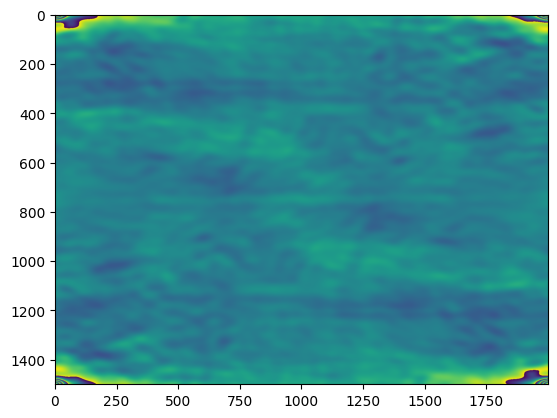

In [ ]:
# Highpass
from google.colab import files
from PIL import Image
import numpy as np
import scipy
import math
import imageio.v2 as iio
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = Image.open(filename).convert('L')
iml = np.asarray(img)

d = abs(scipy.fftpack.fft2(iml))
d = scipy.fftpack.fftshift(d)

M, N = d.shape
H = np.ones((M, N))

center1 = M // 2
center2 = N // 2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**(2 * t2))

H = Image.fromarray(H.astype(float))

con = d * H

e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(np.uint8(e))

img.show()
im3.show()
plt.imshow(im3)
plt.show()
